# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound

In [2]:
data["plot"] = True

data['simple_tp']               = 0.0030
data['stop_loss_pip']           = 0.0015

data['start_date'] = {'year':2021, 'month':5, 'date':1}
data['end_date']   = {'year':2021, 'month':5, 'date':5}

In [3]:
%%time
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

 89%|██████████████████████████████▎   | 143900/161571 [28:42<05:16, 55.85it/s]

pls    0.00278
dtype: float64
--------------------------------------
                  date ord_types               close_type      pls
0  2021-05-04 06:46:06      long         simple_stop_loss -0.00150
1  2021-05-04 07:26:18     short       simple_take_profit  0.00300
2  2021-05-04 15:11:43      long         simple_stop_loss -0.00155
3  2021-05-04 15:12:58      long  simple_slema_move_close  0.00021
4  2021-05-04 15:13:12     short       simple_take_profit  0.00300
5  2021-05-04 19:00:15      long               sema_close -0.00130
6  2021-05-04 19:01:46      long  simple_slema_move_close  0.00008
7  2021-05-05 01:26:06     short  simple_slema_move_close  0.00027
8  2021-05-05 06:11:39      long               sema_close -0.00124
9  2021-05-05 06:14:30      long  simple_slema_move_close -0.00026
10 2021-05-05 07:07:52     short       simple_take_profit  0.00306
11 2021-05-05 12:23:20      long         simple_stop_loss -0.00150
12 2021-05-05 12:37:20      long  simple_slema_move_close -0

100%|██████████████████████████████████| 161571/161571 [33:31<00:00, 80.34it/s]

Wall time: 33min 39s


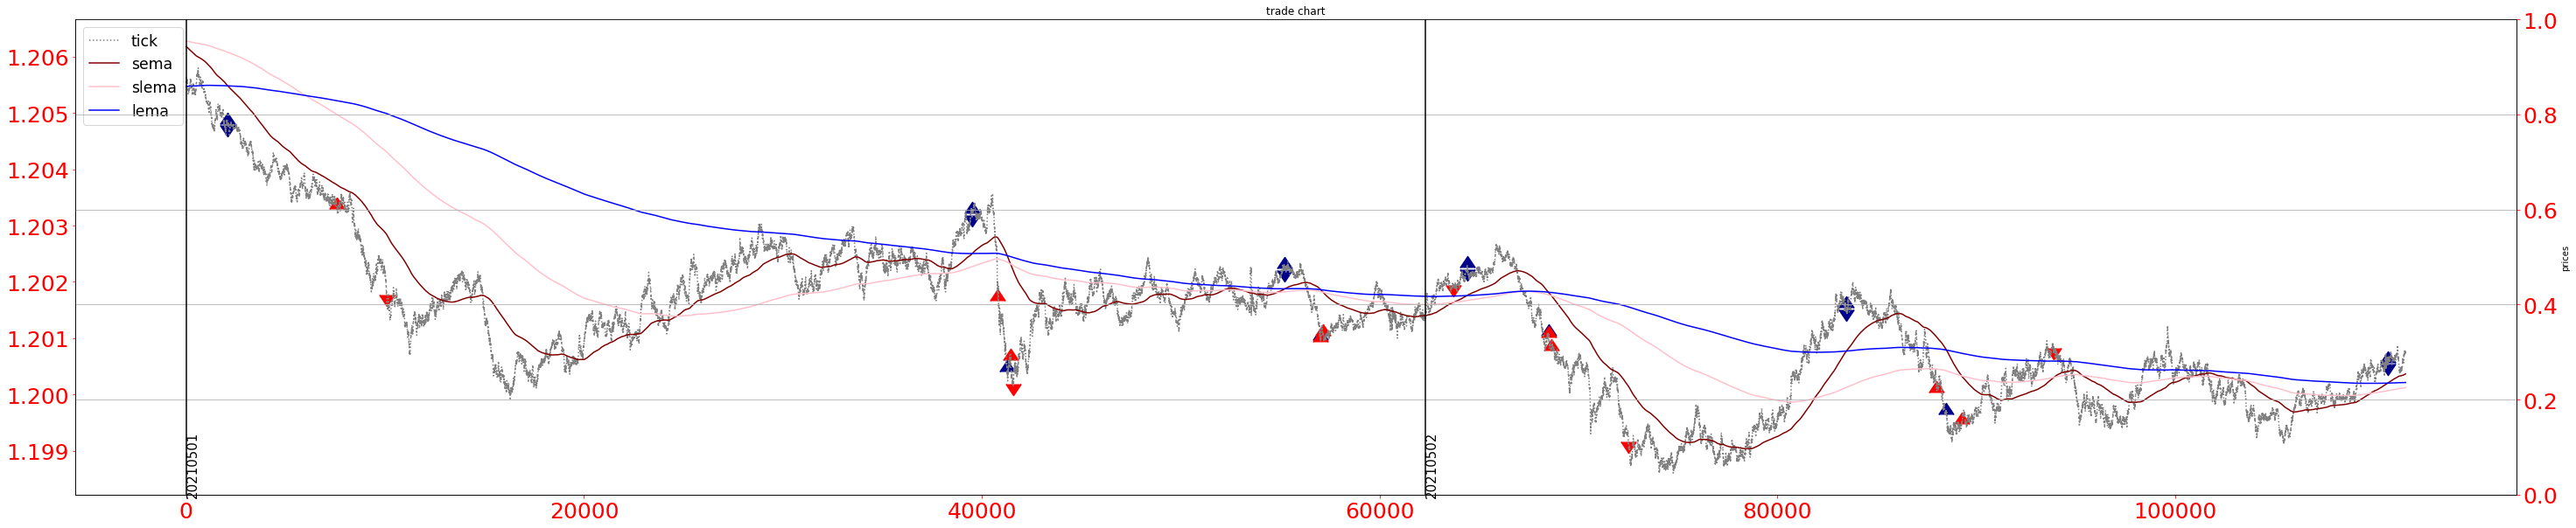

-----------------------------------------------------
date_val          : ['20210501', '20210502', '20210503', '20210504', '20210505']
Total PL : 0.00278
-------------
net_pl            : 0.00278/0.01782
-------------
+ve               : num= 7    sum= +0.0103    avg= +0.00147
-ve               : num= 7    sum= -0.00752    avg= -0.00107
-----------------------------------------------------
date_val
4    0.00194
5    0.00084
Name: pls, dtype: float64
-----------------------------------------------------
 0.00300    2
-0.00150    2
-0.00017    1
-0.00124    1
 0.00306    1
 0.00021    1
-0.00026    1
-0.00130    1
 0.00027    1
-0.00155    1
 0.00008    1
 0.00068    1
Name: pls, dtype: int64
-----------------------------------------------------


In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['date_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['pls'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)